# Data Engineering

---

 This notebook is about data engineering of 7 feature that we chose to regress the likelihood of lonely death and well-being. 
All data are based on, mostly, research and report that held in 2022 by MOHW in South Korea and additionally, papers that adressed each feature or lonely death.


Since the data is discrete, and some feature has multiple aspect, we set two rule to process statistic into dataframe.

    - interpolate the data with various distributions
    - if one feature has multiple statistics, add interpolated datas and also correlation of two.

After that, we give features some linearity. But in real data, there not only linearity, but also randomness. Hence, we add randomness by choose two indices followed by normal distribution mean at middle, i.e. median or half of data_len, and change two values.

In [35]:
# import libraries

import numpy as np
import pandas as pd
import math
import random
import matplotlib.pyplot as plt
from typing import Optional, Tuple
from scipy.stats import truncnorm
from numpy import ndarray

np.random.seed(42)
plt.style.use('ggplot')

In [36]:
data_len = 10000
linearity_strongness = 5
random_stongness = 2500

In [37]:
# functions

def generate_n_truncnorm(n: int, 
                         loc: float, 
                         scale: float, 
                         low_bound: float, 
                         upp_bound: float) -> ndarray:
    
    return truncnorm((low_bound - loc)/scale, (upp_bound - loc)/scale, loc= loc, scale= scale).rvs(n)

def generate_n_truncgamma(n: int,
                          alpha: float,
                          beta: float,
                          low_bound: float,
                          upp_bound: float) -> ndarray:
    
    data = np.random.gamma(shape= alpha, scale= beta, size= n)
    return (upp_bound - low_bound)*data/max(data) + low_bound


def add_correlation(n_arr: ndarray, 
                    m_arr: ndarray, 
                    data_len: int = data_len) -> ndarray:
    
    n, m = len(n_arr), len(m_arr)
    n_ratio, m_ratio = math.ceil(n * (data_len - n - m)/(n + m)), math.floor(m * (data_len - n - m)/(n + m))
    return np.concatenate((n_arr, m_arr, np.multiply(np.random.choice(n_arr, n_ratio), abs(np.random.choice(m_arr, n_ratio))), np.multiply(np.random.choice(m_arr, m_ratio), abs(np.random.choice(n_arr, m_ratio)))), axis= 0)

def add_linearity(data: ndarray,
                  strongless: int = linearity_strongness,              
                  data_len: int = data_len) -> ndarray:
    
    # The reason this is linearity is because we eventually concat all data into one dataframe, so if we add linearity on index for each feature, then we get linearity. 
    
    if data_len%strongless != 0:
        raise ValueError 
    
    unit_len = data_len // strongless

    data = sorted(data)

    for i in range(strongless):
        data[i*unit_len : (i+1)*unit_len] = random.sample(data[i*unit_len : (i+1)*unit_len], unit_len)

    return data
    
def add_randomness(data: ndarray,
                   strongness: int = random_stongness,
                   data_len: int = data_len,
                   scale: float = 2500) -> ndarray:
    
    if strongness > data_len//2 or strongness <= 0:
        raise ValueError 

    median_index = data_len//2

    for i in range(strongness):
        indices = generate_n_truncnorm(n= 2, loc= median_index, scale= scale, low_bound= 0, upp_bound= data_len - 1)
        data[round(indices[0])], data[round(indices[1])] = data[round(indices[1])], data[round(indices[0])]
        
    return data


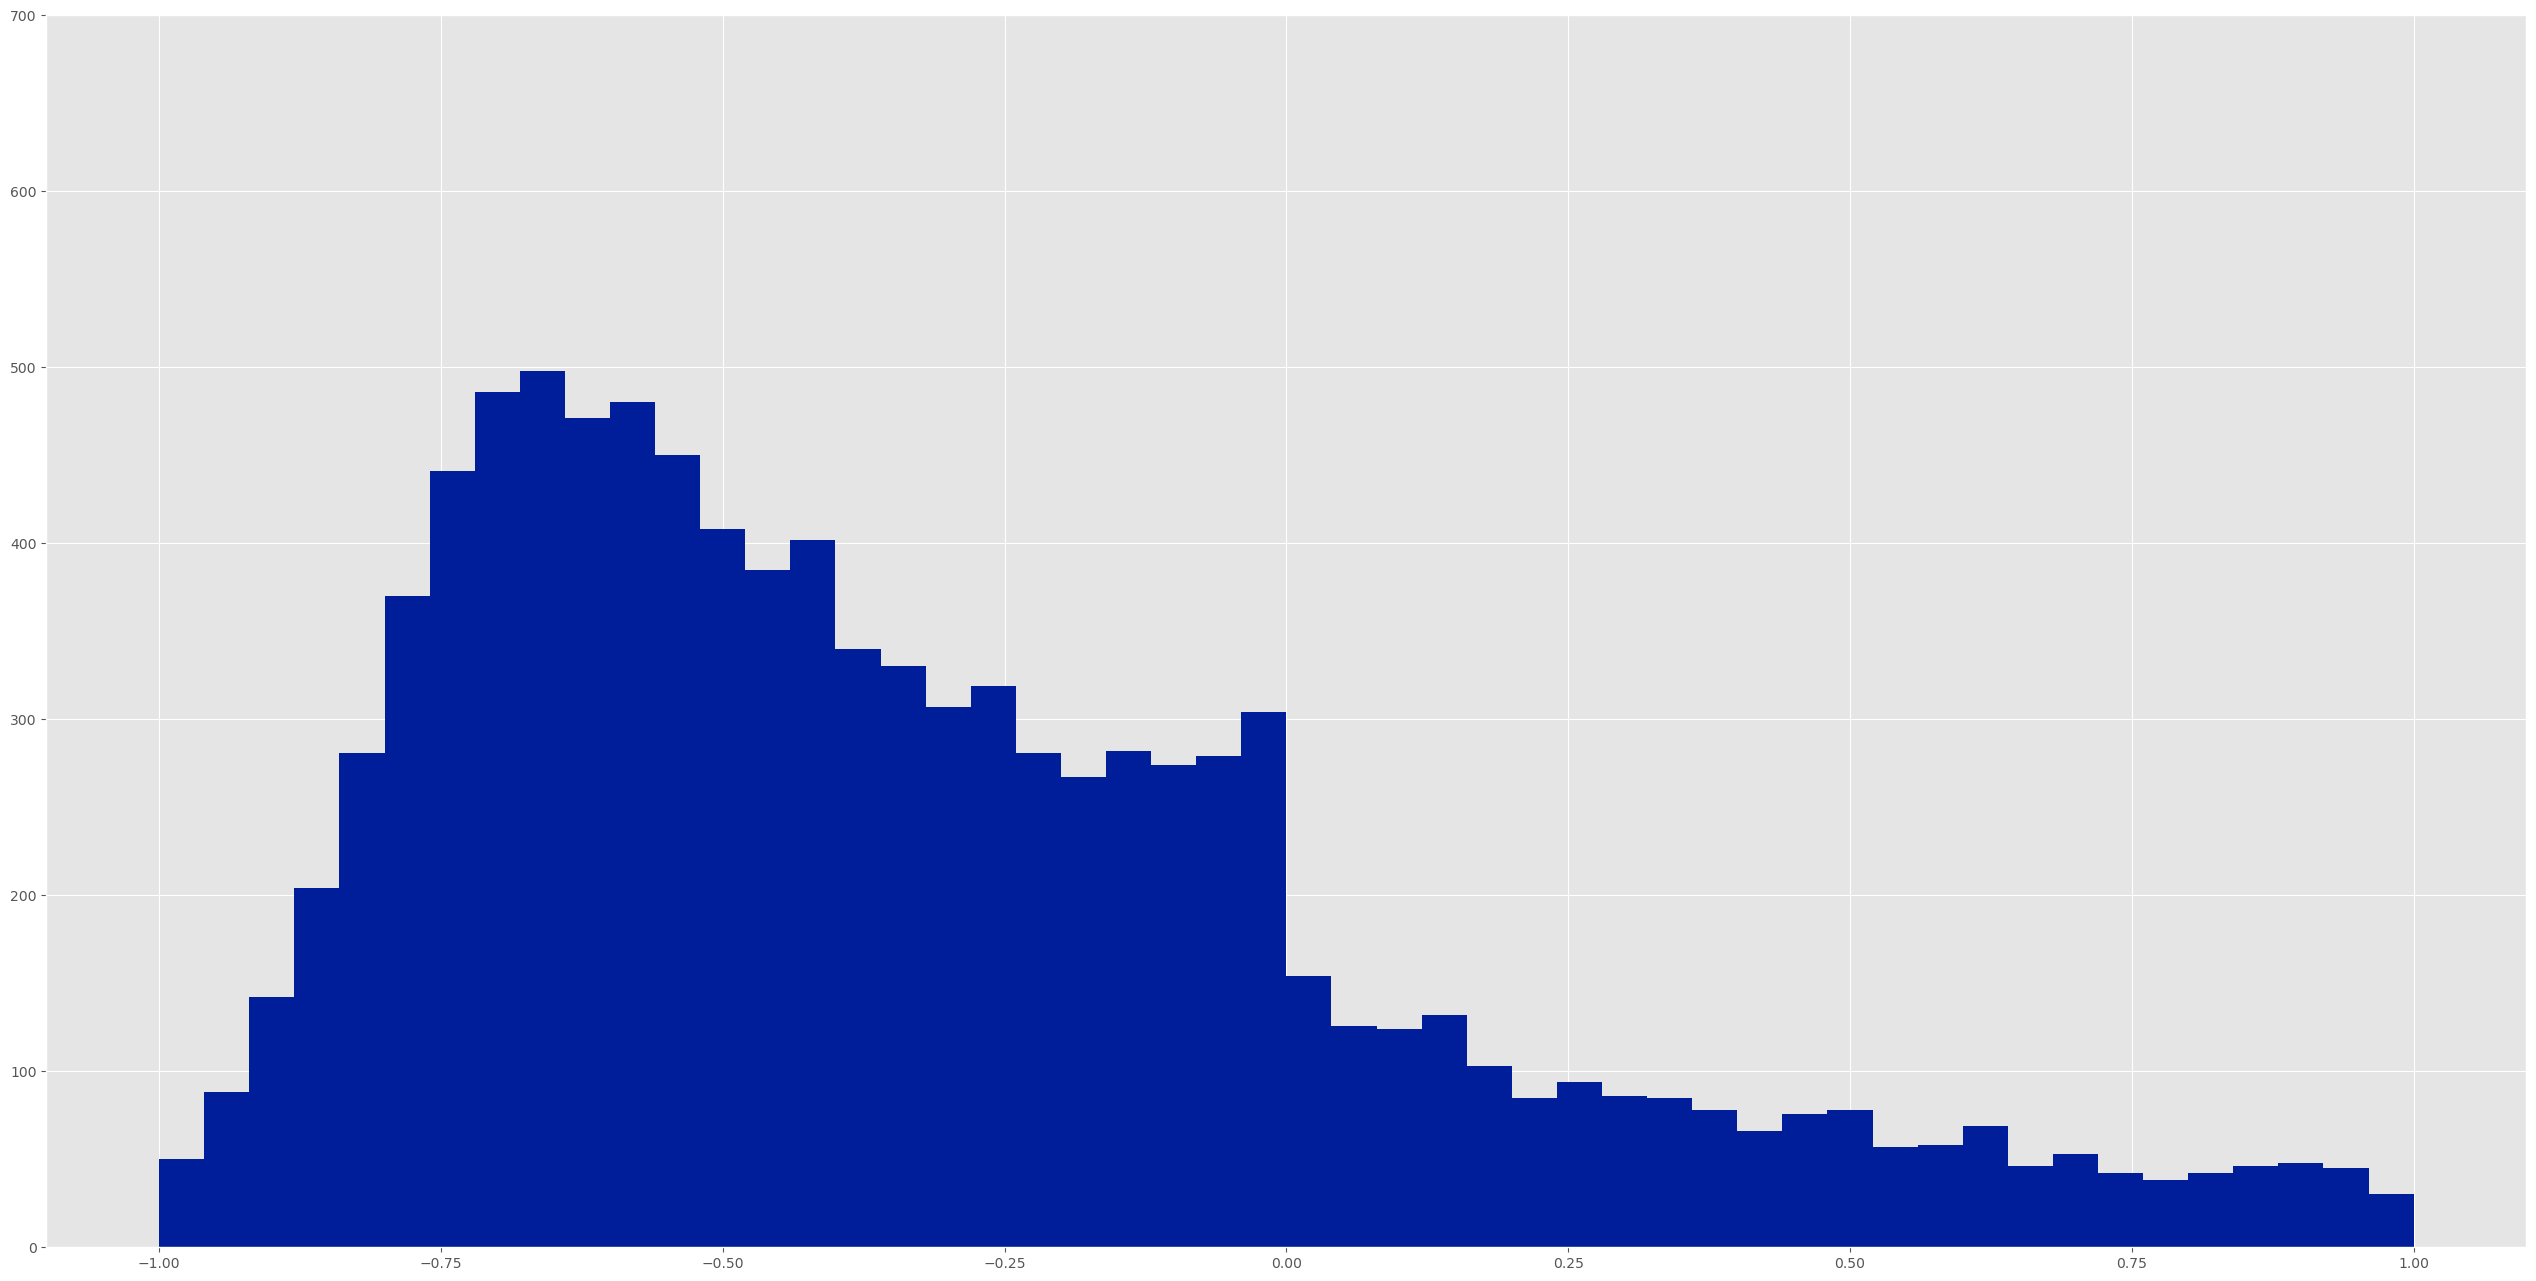

In [38]:
br1 = generate_n_truncnorm(n= 3000, loc= -0.2, scale= 1, low_bound= -1, upp_bound= 1)
br2 = generate_n_truncgamma(n= 5000, alpha= 4, beta= 5, low_bound= -1, upp_bound= 1)

brain_activity = add_correlation(n_arr= br1, m_arr= br2, data_len= data_len)

brain_activity = add_linearity(data= brain_activity)

brain_activity = add_randomness(data= brain_activity)


fig = plt.figure(figsize= (32, 16))

axis = fig.gca()
axis.hist(brain_activity, bins= 50, color= "#001E99")
plt.ylim([0, 700])
plt.show();

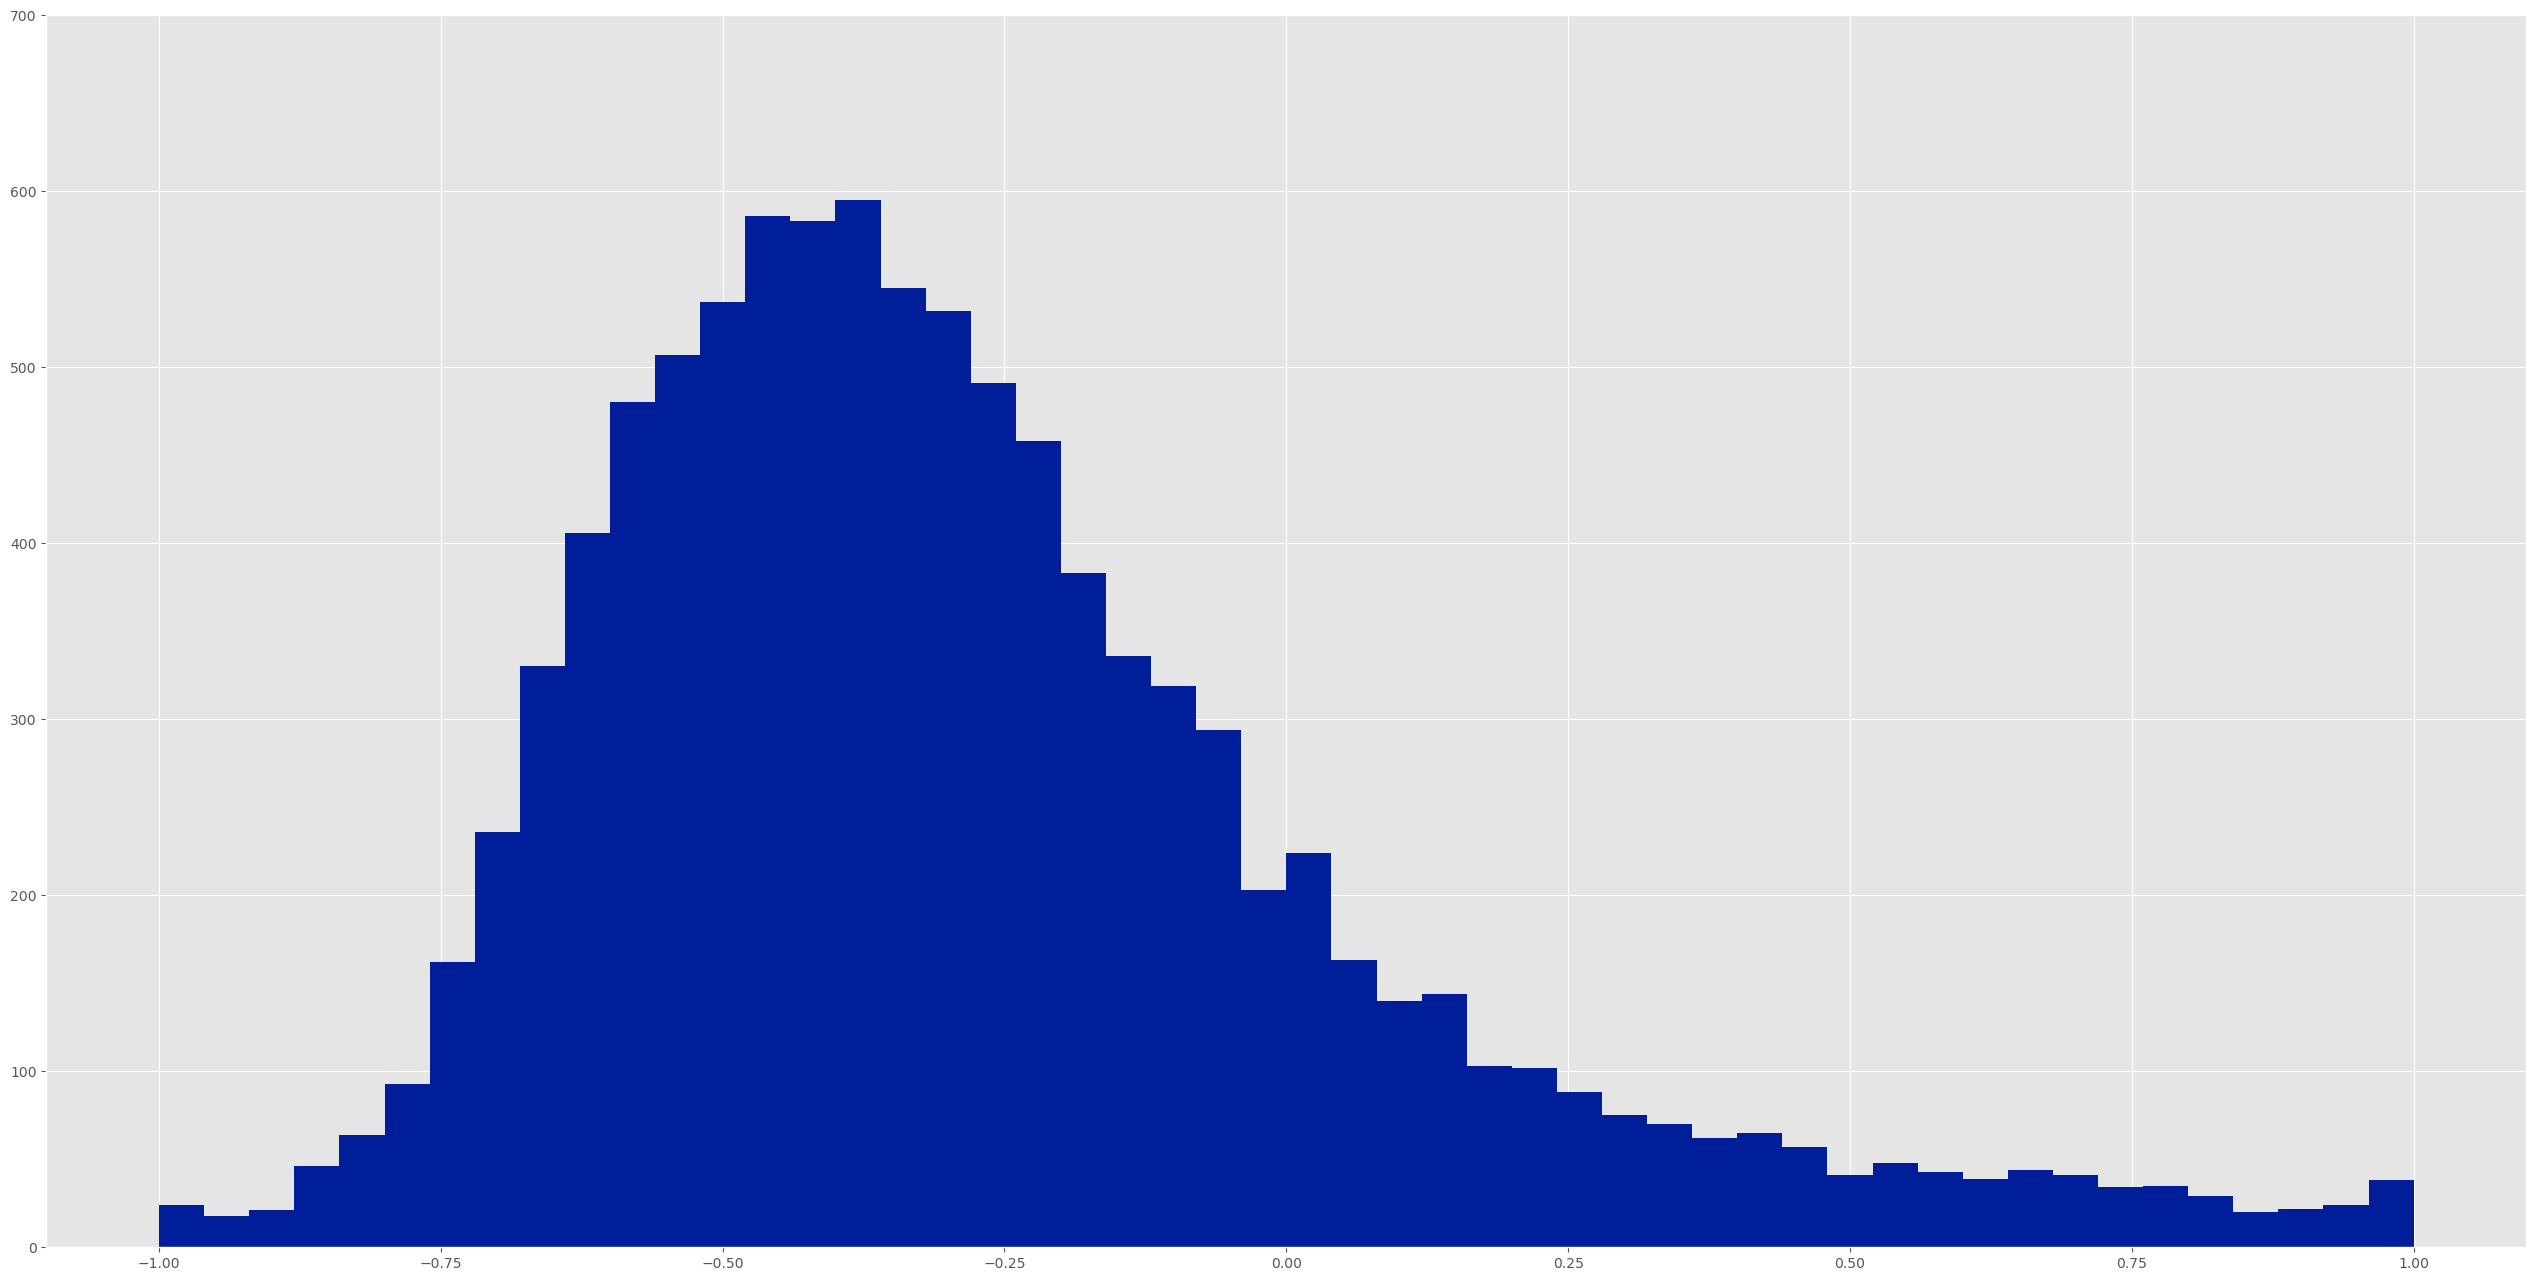

In [39]:
em1 = generate_n_truncgamma(n= 5500, alpha= 7, beta= 100, low_bound= -1, upp_bound= 1)
em2 = generate_n_truncgamma(n= 2500, alpha= 10, beta= 100, low_bound= -1, upp_bound= 1)
em3 = generate_n_truncnorm(n= 2000, loc= 0, scale= 0.75, low_bound= -1, upp_bound= 1)

emotion = np.concatenate((em1, em2, em3), axis= 0)

emotion = add_linearity(emotion)

emotion = add_randomness(emotion)

fig = plt.figure(figsize= (32, 16))

axis = fig.gca()
axis.hist(emotion, bins= 50, color= "#001E99")
plt.ylim([0, 700])
plt.show();

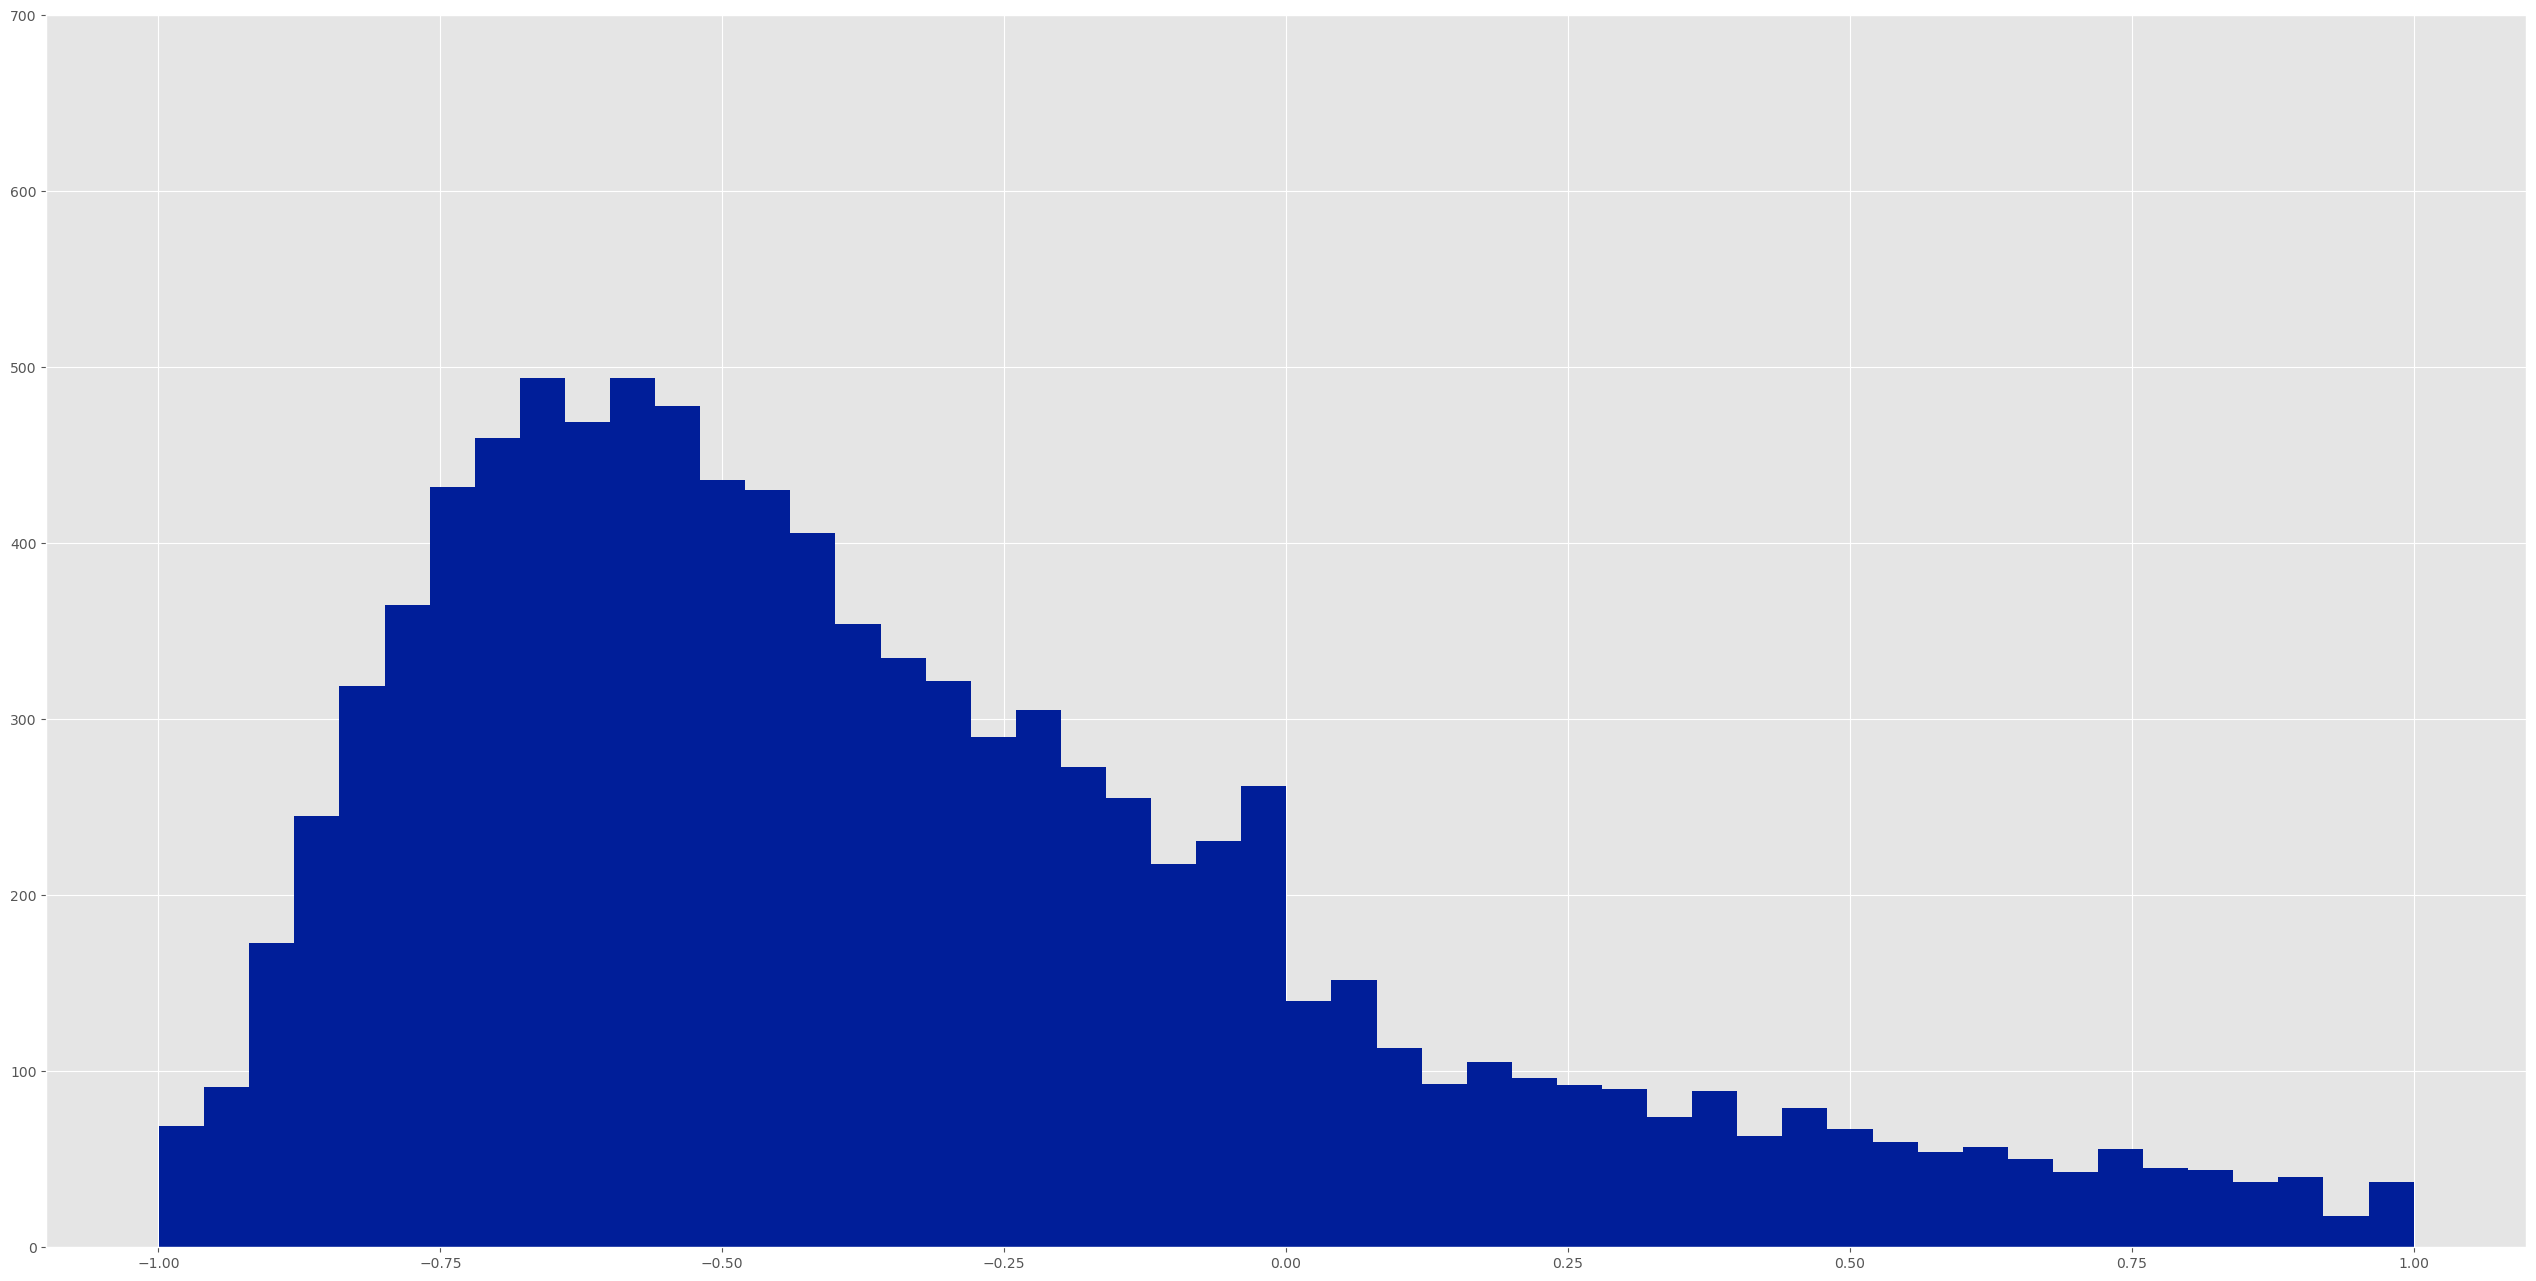

In [40]:


en1 = generate_n_truncgamma(n= 6000, alpha= 3.5, beta= 50, low_bound= -1, upp_bound= 1)
en2 = generate_n_truncnorm(n= 3000, loc= -0.3, scale= 1, low_bound= -1, upp_bound= 1)

environment = add_correlation(n_arr= en1, m_arr= en2)

environment = add_linearity(environment)

environment = add_randomness(environment)

fig = plt.figure(figsize= (32, 16))

axis = fig.gca()
axis.hist(environment, bins= 50, color= "#001E99")
plt.ylim([0, 700])
plt.show();

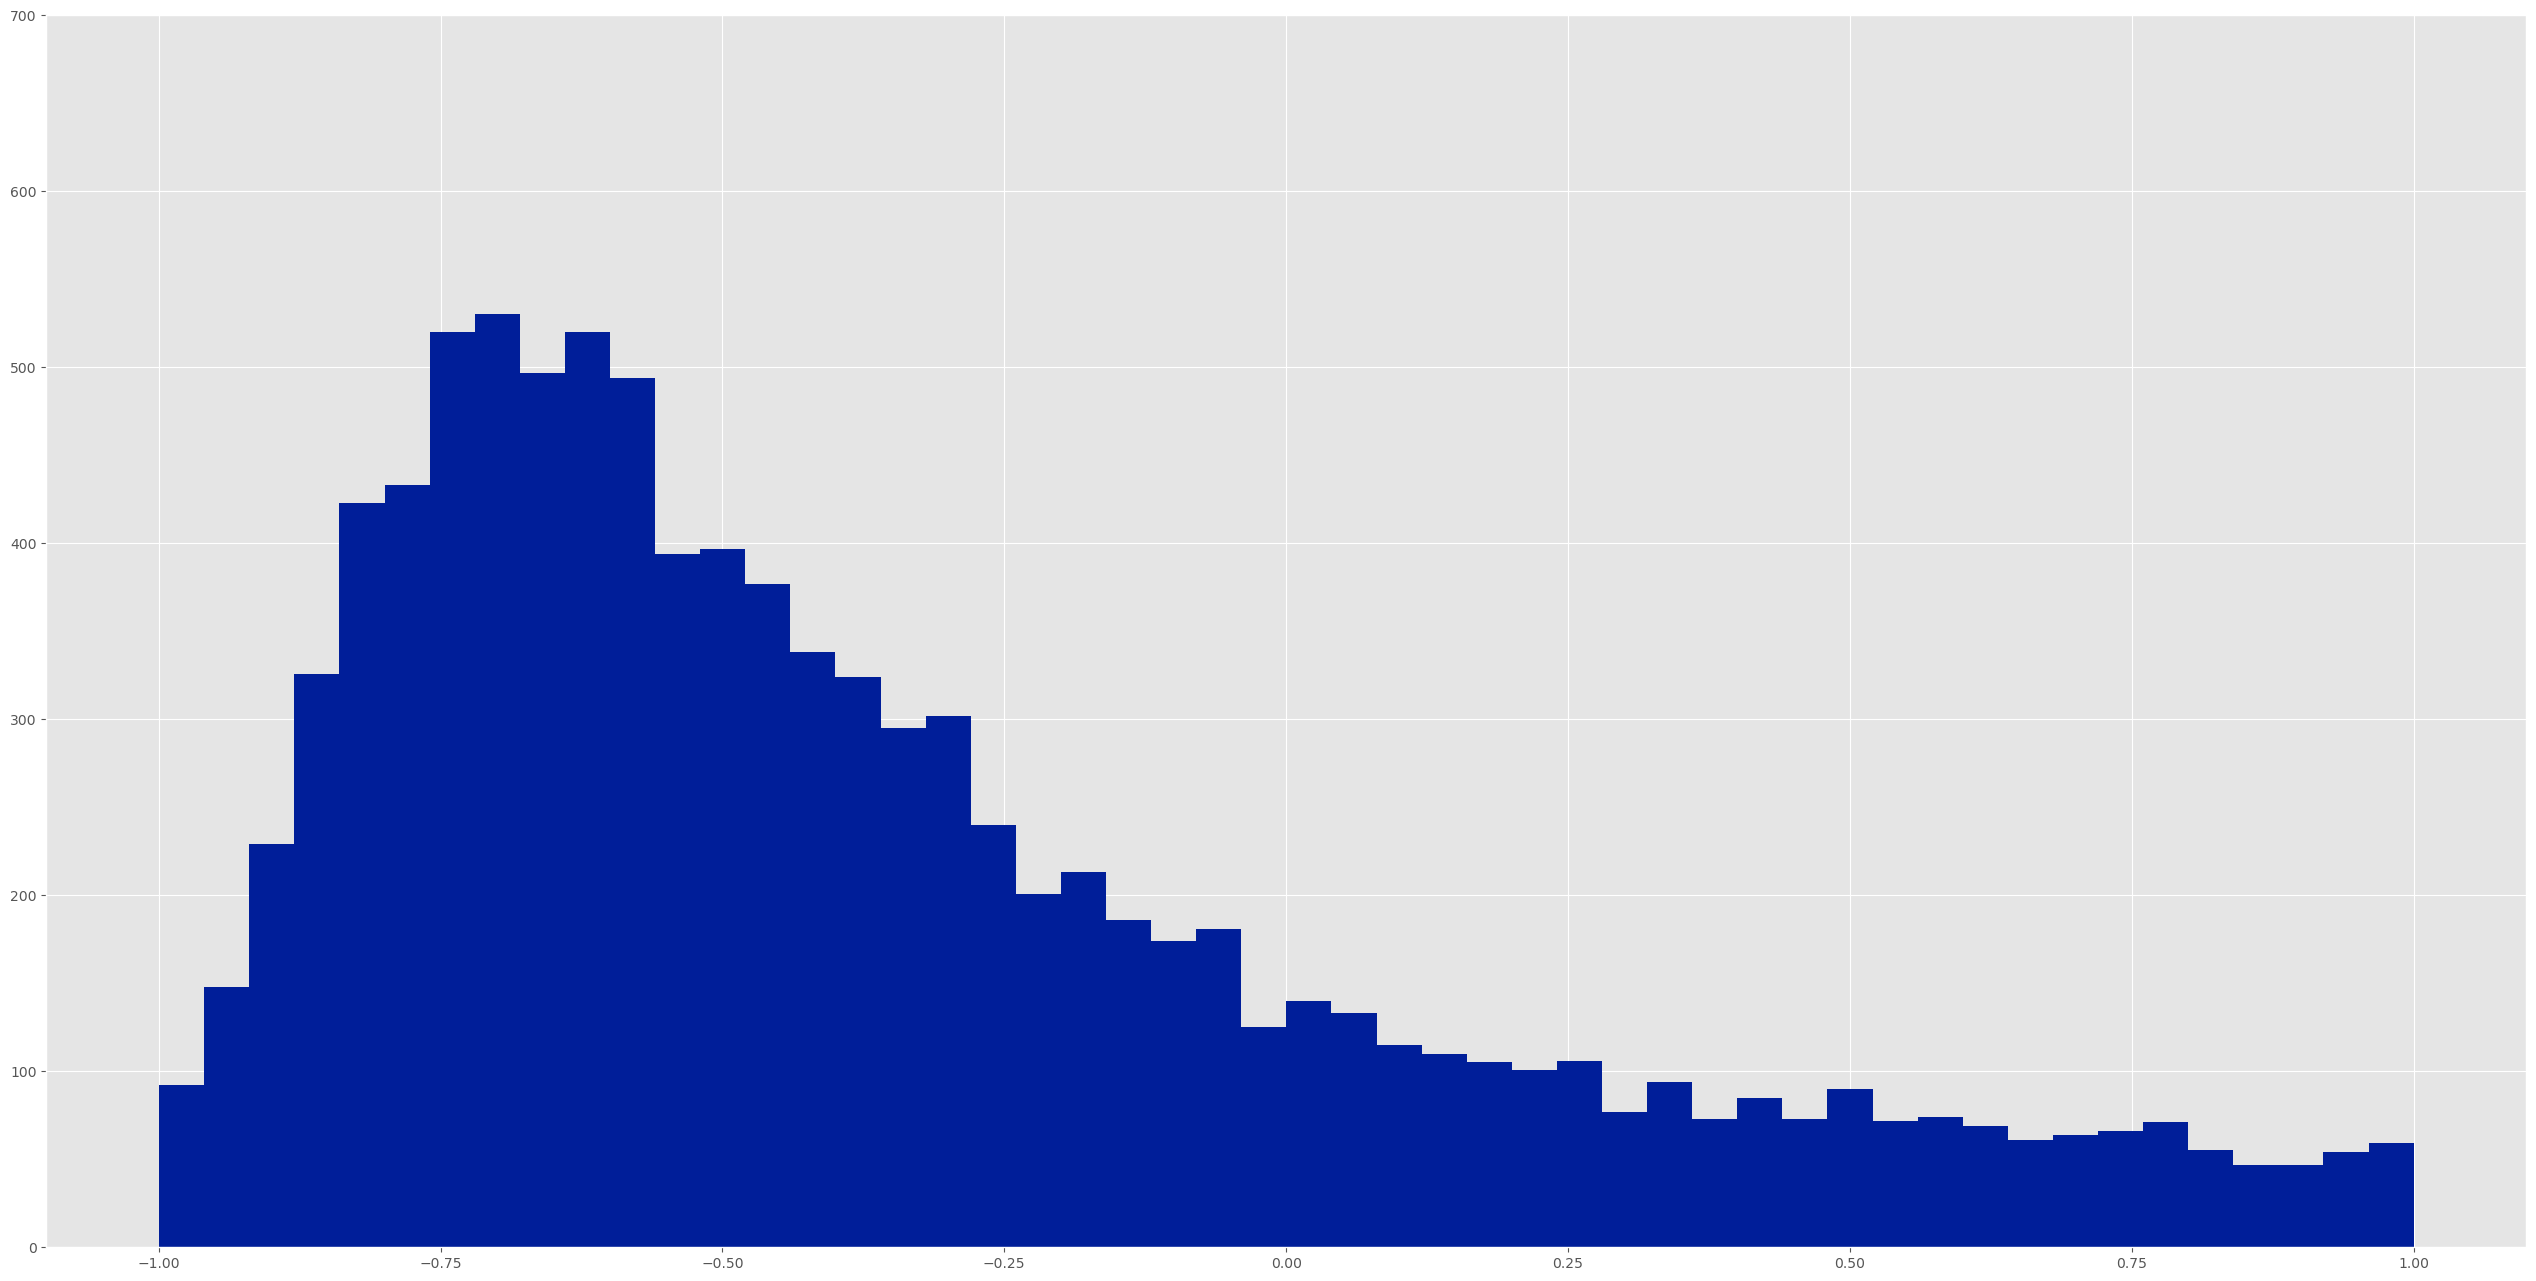

In [41]:
ex1 = generate_n_truncnorm(n= 4000, loc= -0.2, scale= 1, low_bound= -1, upp_bound= 1)
ex2 = generate_n_truncgamma(n= 6000, alpha= 3, beta= 5, low_bound= -1, upp_bound= 1)

exercise = sorted(np.concatenate((ex1, ex2), axis= 0))

exercise = add_linearity(exercise)

exercise = add_randomness(exercise)

fig = plt.figure(figsize= (32, 16))

axis = fig.gca()
axis.hist(exercise, bins= 50, color= "#001E99")
plt.ylim([0, 700])
plt.show();

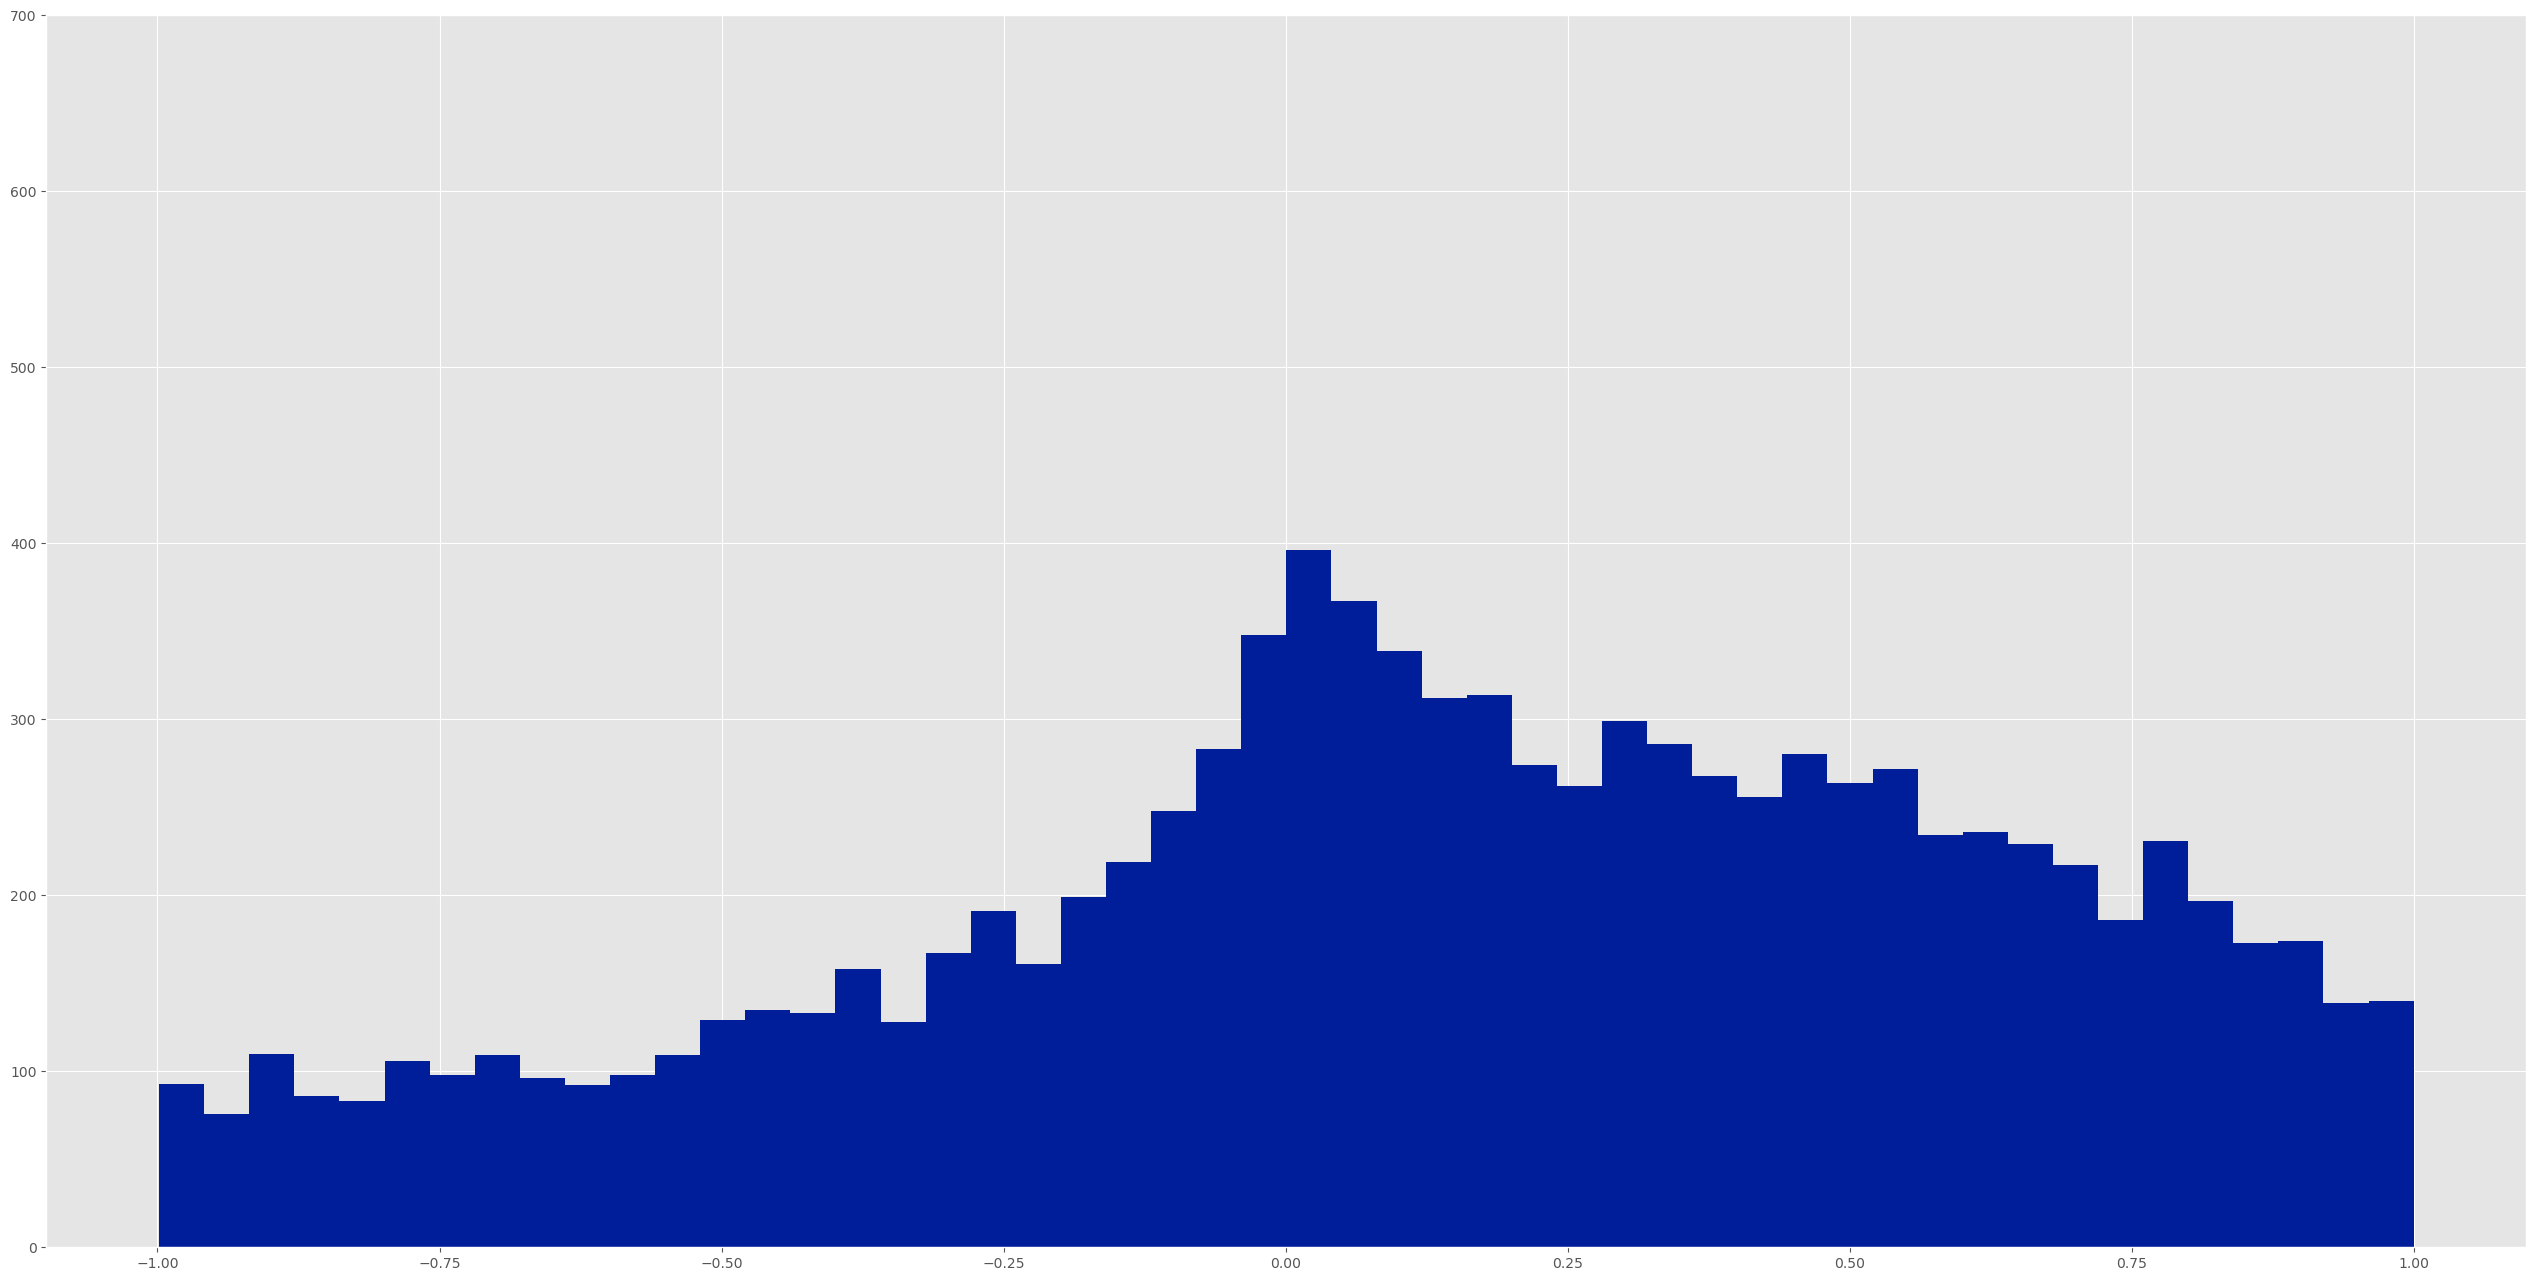

In [42]:
nt1 = generate_n_truncnorm(n= 5000, loc= 0.5, scale= 0.5, low_bound= -1, upp_bound= 1)       
nt2 = generate_n_truncnorm(n= 3000, loc= -0.75, scale= 1, low_bound= -1, upp_bound= 1)       

nutrition = add_correlation(n_arr= nt1, m_arr= nt2, data_len= data_len)

nutrition = add_linearity(data= nutrition, strongless= linearity_strongness, data_len= data_len)

nutrition = add_randomness(data= nutrition, strongness= random_stongness, data_len= data_len, scale= 2500)

fig = plt.figure(figsize= (32, 16))

axis = fig.gca()
axis.hist(nutrition, bins= 50, color= "#001E99")
plt.ylim([0, 700])
plt.show();

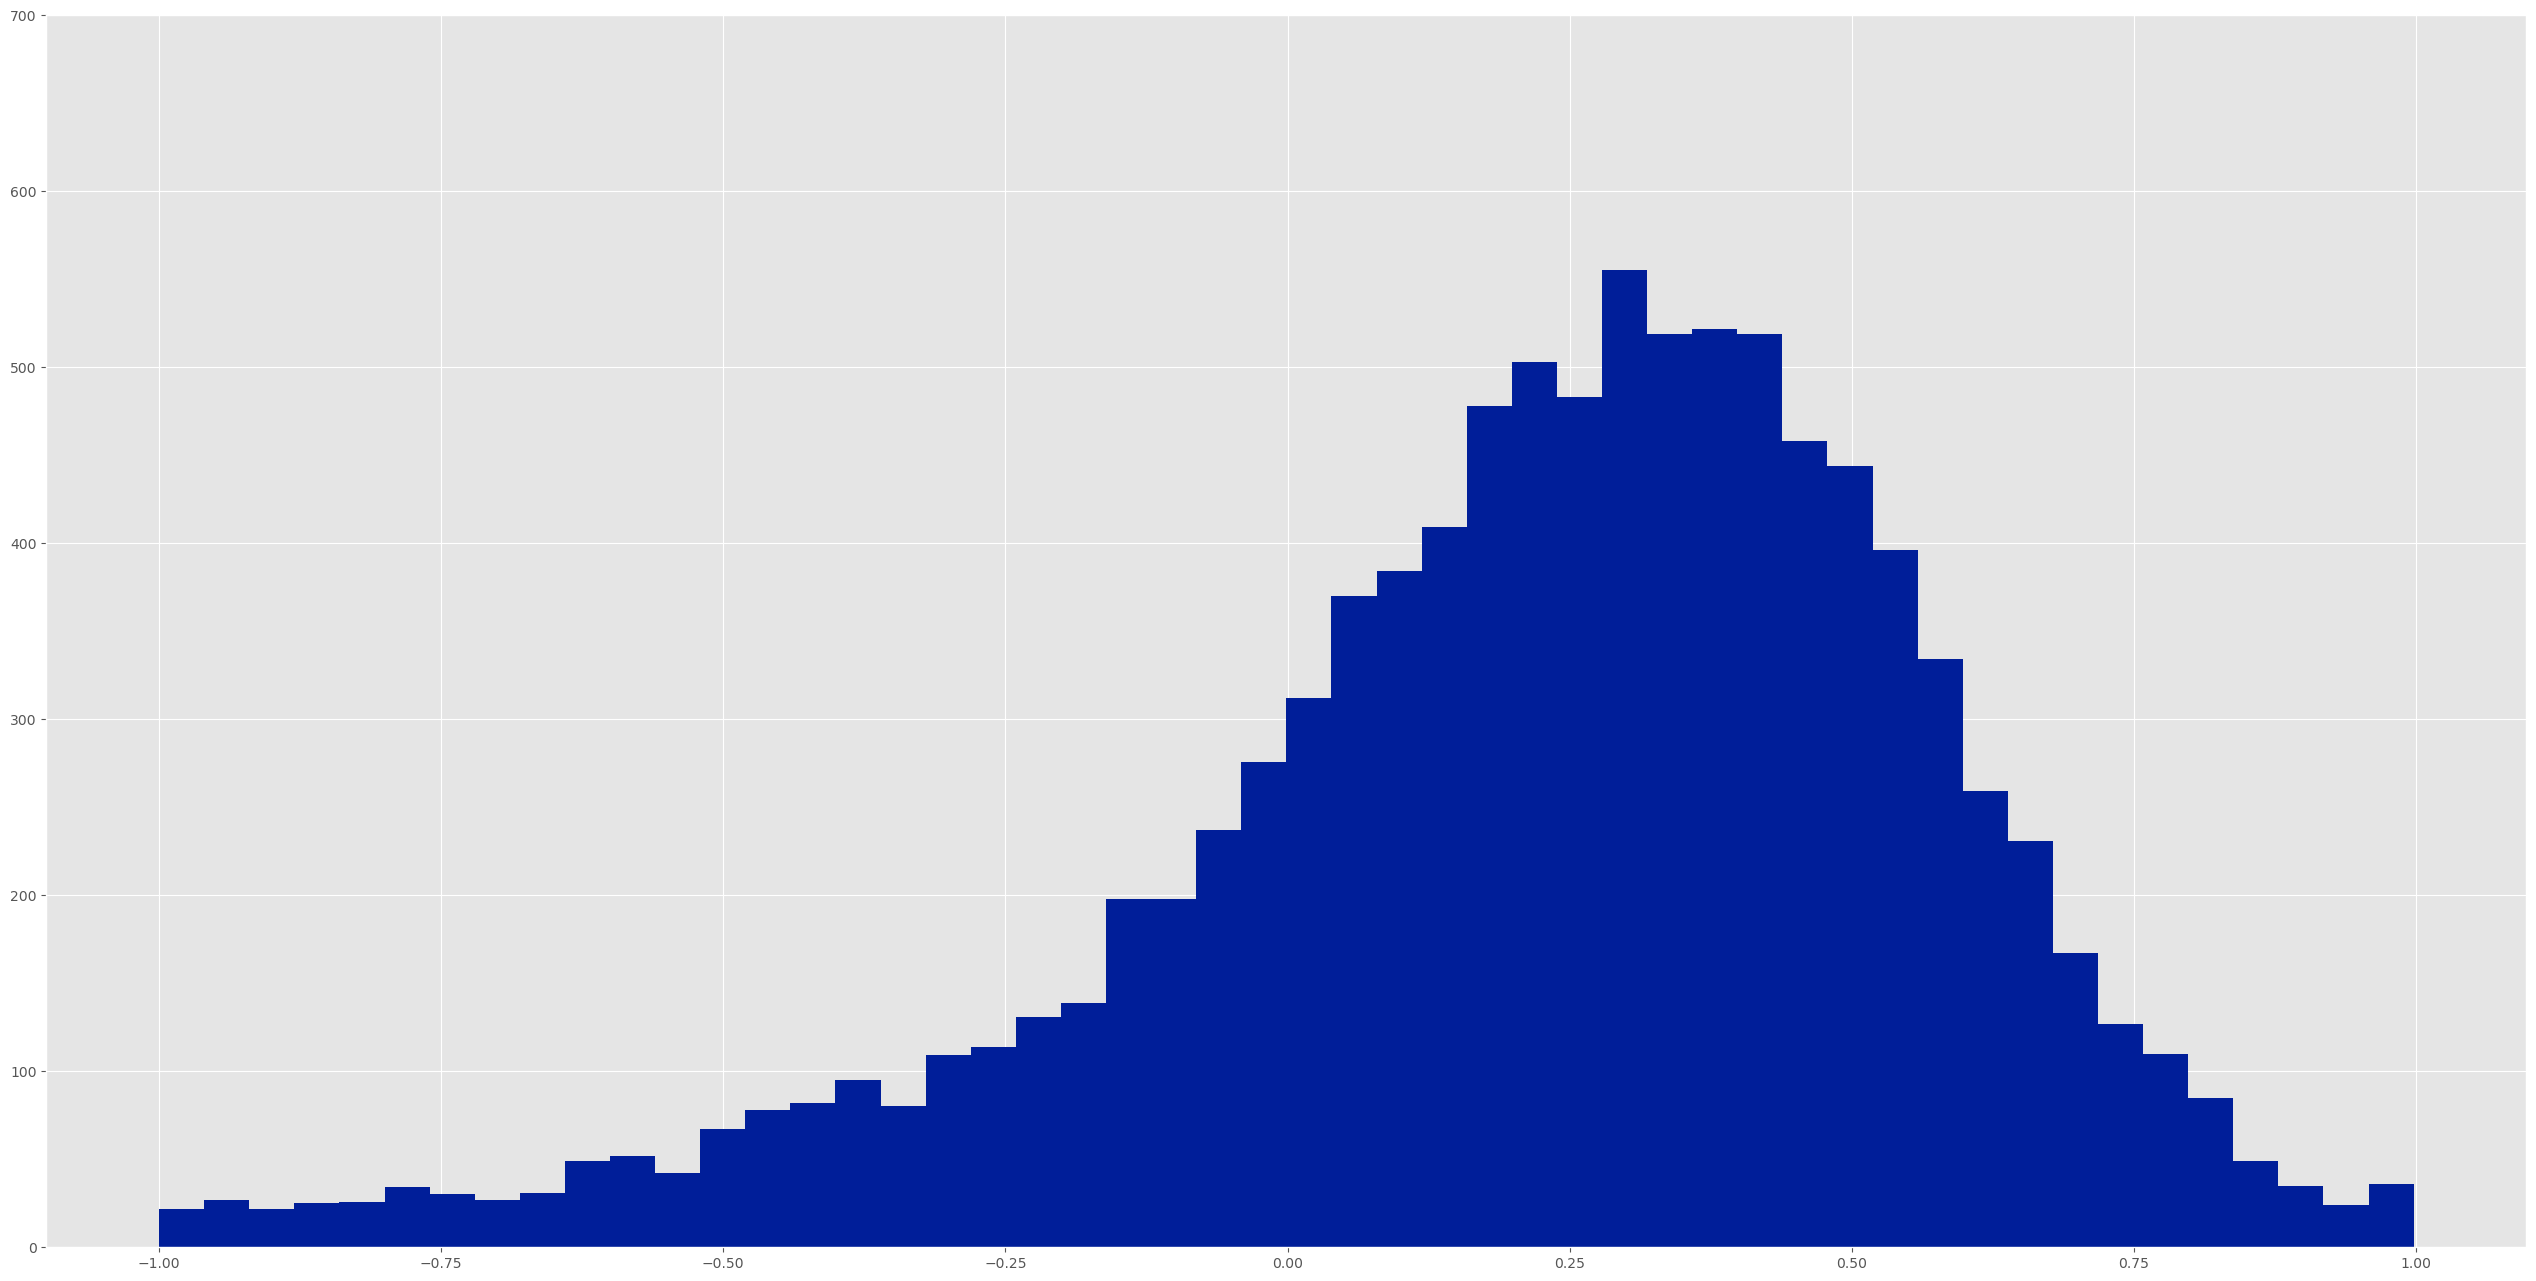

In [43]:
re1 = generate_n_truncgamma(n= 5500, alpha= 10, beta= 100, low_bound= 1, upp_bound= -1)
re2 = generate_n_truncgamma(n= 2500, alpha= 5, beta= 100, low_bound= 1, upp_bound= -1)
re3 = generate_n_truncnorm(n= 2000, loc= 0, scale= 0.75, low_bound= -1, upp_bound= 1)

rest = np.concatenate((re1, re2, re3), axis= 0)

rest = add_linearity(rest)

rest = add_randomness(rest)

fig = plt.figure(figsize= (32, 16))

axis = fig.gca()
axis.hist(rest, bins= 50, color= "#001E99")
plt.ylim([0, 700])
plt.show();

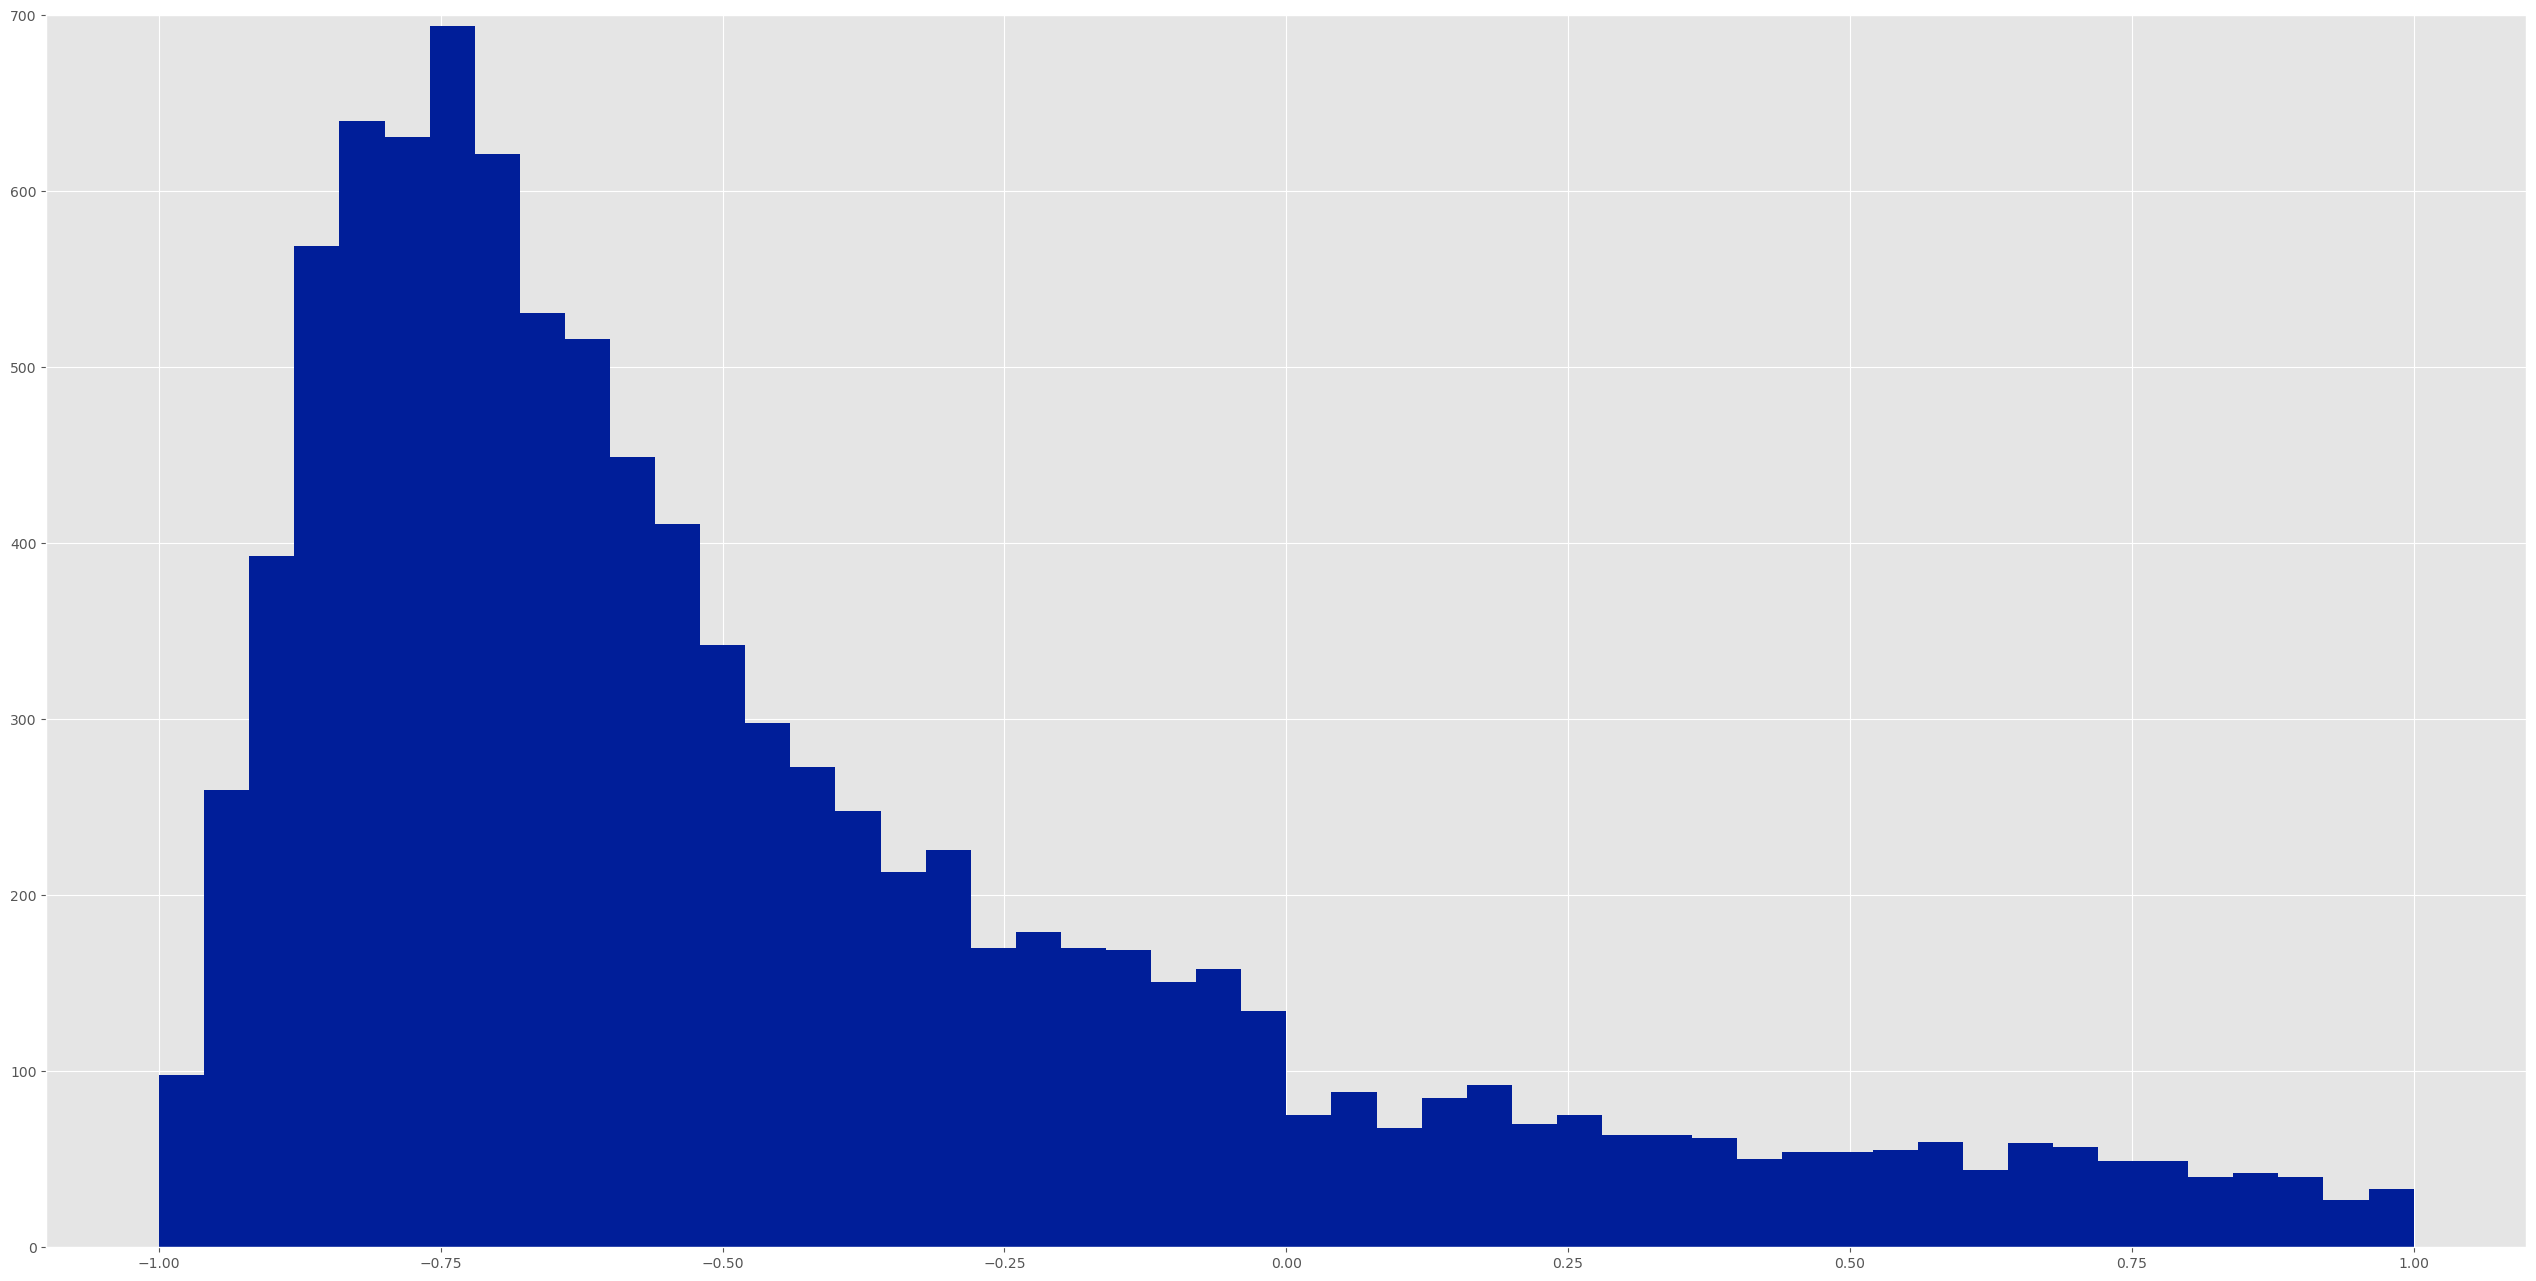

In [44]:
so1 = generate_n_truncgamma(n= 6000, alpha= 3, beta= 5, low_bound= -1, upp_bound= 1)
so2 = generate_n_truncnorm(n= 3000, loc= -0.3, scale= 1, low_bound= -1, upp_bound= 1)

social_activity = add_correlation(so1, so2)

social_activity = add_linearity(social_activity)

social_activity = add_randomness(social_activity)

fig = plt.figure(figsize= (32, 16))

axis = fig.gca()
axis.hist(social_activity, bins= 50, color= "#001E99")
plt.ylim([0, 700])
plt.show();

In [45]:
dataset = [brain_activity, emotion, environment, exercise, nutrition, rest, social_activity]
for i, v in enumerate(dataset):
    v = np.array(v)
    dataset[i] = v.reshape((-1, 1))

dataset = np.concatenate(tuple(dataset), axis= 1)

In [46]:
noise = np.random.normal(loc= 0, scale= 0.15, size= (10000, 7))

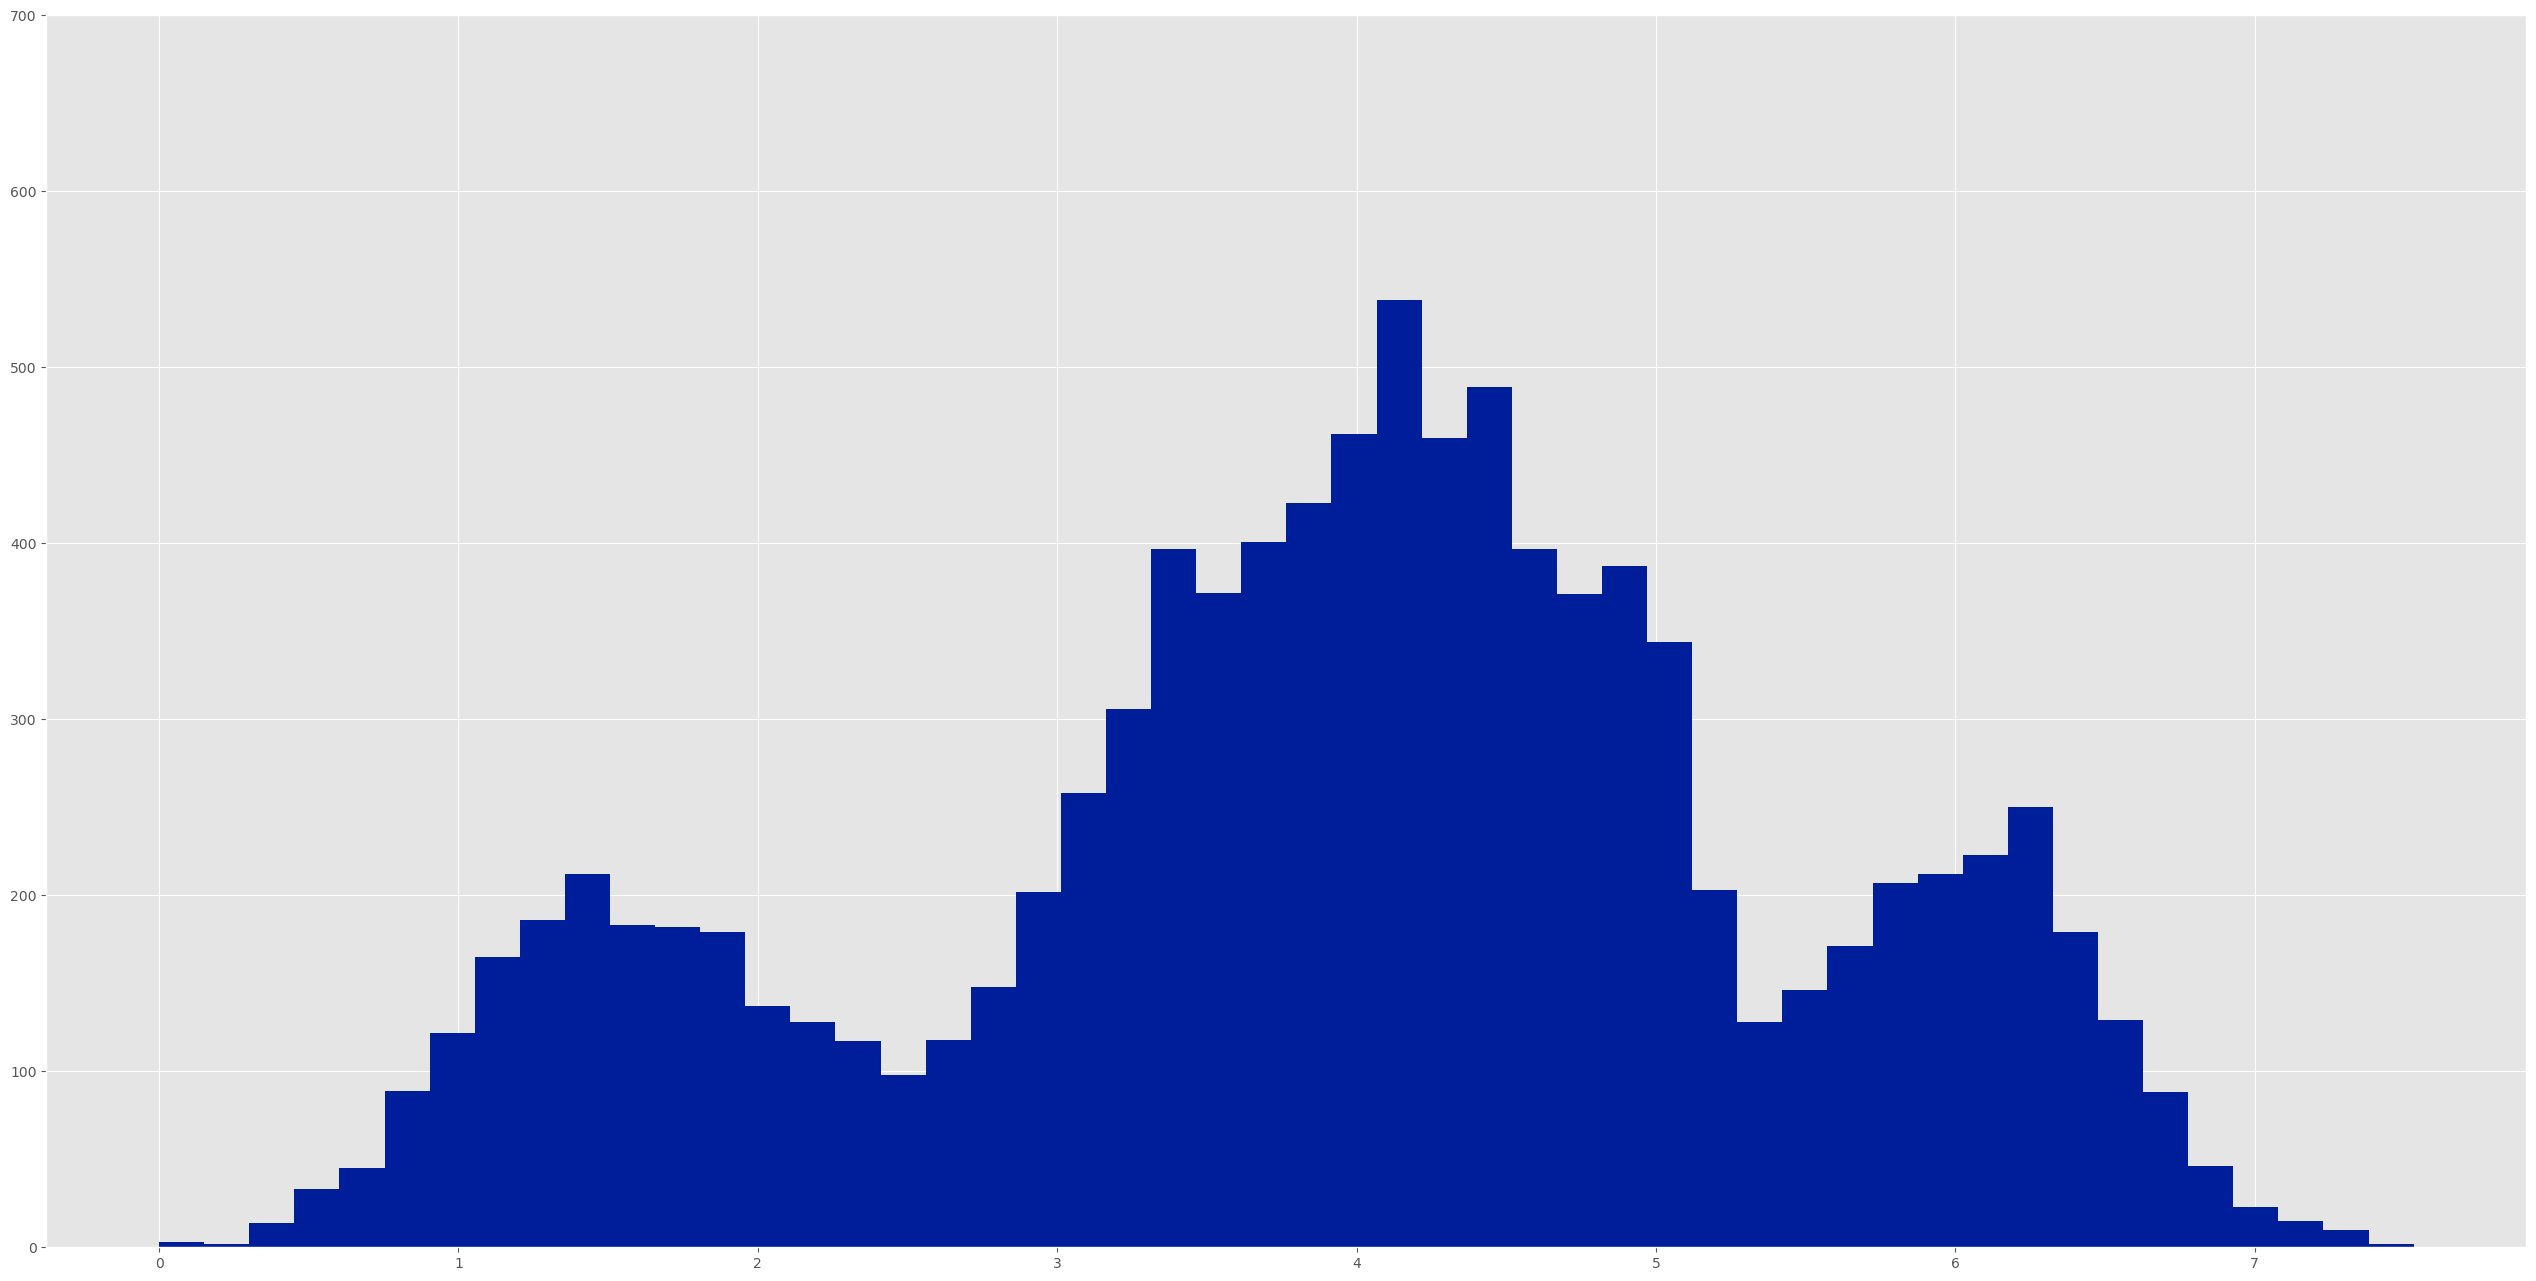

In [49]:
likelihood_lonely_death = np.zeros((10000, 1))

for i, x in enumerate(dataset):
    likelihood_lonely_death[i] = -0.6*x[0] + (2)**(-x[1]) + (1.5)**(-x[2]) + (1.2)**(-x[3] + 1) - x[4] - x[5] + (1.3)**(-x[6] + 0.5) + (x[1] - 1)*(x[6] - 1)

likelihood_lonely_death -= likelihood_lonely_death.mean()
likelihood_lonely_death -= likelihood_lonely_death.min()
likelihood_lonely_death /= likelihood_lonely_death.std()/1.5

fig = plt.figure(figsize= (32, 16))

axis = fig.gca()
axis.hist(likelihood_lonely_death, bins= 50, color= "#001E99")
plt.ylim([0, 700])
plt.show();

In [ ]:
dataset = np.concatenate((dataset + noise, likelihood_lonely_death), axis= 1)
np.random.shuffle(dataset)
dataset.shape

In [ ]:
dataset_df = pd.DataFrame(dataset, columns= ["brain_activity", "emotion", "environment", "exercise", "nutrition", "rest", "social_activity", "likelihood_lonely_death"])
dataset_df.head

In [ ]:
dataset_df.to_csv("wiro_dataframe", encoding= "utf-8")